**Name** : Sonika Kulkarni

**Div** : TY3     

**Batch** : B

**Roll no** : 34

**Subject** : DWM

**Experiment 7** : Implementation of Data Discretization & Visualization


# **Aim :**

Implementation of Data Discretization & Visualization using Python codes

# **Introduction**

This experiment demonstrates Python-based data preprocessing and visualization techniques for weather data analysis. Using pandas for data manipulation and scikit-learn's KBinsDiscretizer, we transform continuous weather measurements (temperature, precipitation, pressure) into discrete categories for pattern recognition. The implementation includes three key visualizations: a seasonal temperature distribution chart, a pressure-temperature correlation plot with precipitation encoding, and a comparative time-series analysis of land versus ocean probe readings. These visualizations enable efficient exploration of multidimensional weather patterns from the bureau's decade-long dataset.



# **Procedure for Implementing Data Discretization & Visualization**
**1. Data Preparation**

Import the weather dataset containing timestamp, probe ID, temperature, precipitation and pressure readings

Clean the data by handling missing values and removing duplicates

Convert timestamp column to datetime format for temporal analysis

Extract time-based features including year, month, season and hour from timestamps

**2. Data Discretization**

Categorize continuous numerical weather measurements into discrete bins:

Temperature: Divide into 3 categories (Cold, Mild, Hot) using equal-width binning

Precipitation: Classify into 4 intensity levels (None, Light, Moderate, Heavy) using quantile binning

Pressure: Group into ranges (Low, Normal, High) based on standard deviations

Apply KBinsDiscretizer from scikit-learn for consistent binning across all probes

Assign meaningful labels to each bin for interpretability

**3. Feature Engineering**

Create derived features:

Probe type classification (Land/Ocean based on location)

Weather severity index combining temperature and precipitation

Anomaly detection flags for extreme weather events

Generate temporal aggregations (daily averages, monthly maxima)

**4. Visualization Implementation**

**Seasonal Patterns Analysis**

Construct a stacked bar chart showing:

X-axis: Seasons (Winter, Spring, Summer, Fall)

Y-axis: Frequency count of temperature categories

Stacked segments: Cold/Mild/Hot temperature bins

**Multivariate Correlation**

Develop a scatter plot visualization with:

X-axis: Temperature values

Y-axis: Pressure readings

Color encoding: Precipitation intensity levels

Size encoding: Probe elevation (optional)

**Temporal Trends**

Generate time series line charts comparing:

Annual average temperatures between land and ocean probes

Monthly precipitation patterns across different regions

Decadal pressure variations with trend lines

**5. Analysis & Interpretation**

Identify dominant weather patterns from visualizations

Detect anomalies and seasonal variations

Compare weather behavior across different locations

Derive insights about climate trends over the 10-year period

**6. Expected Outcomes**

Clean, discretized dataset ready for analytical queries

Interactive visualizations revealing weather patterns

Documentation of key findings and observations

Identification of significant correlations between weather variables

**Key Considerations**

Ensure consistent binning strategy across all years

Handle edge cases for extreme weather measurements

Optimize visualization parameters for clarity

Maintain temporal continuity in trend analysis

Document all preprocessing steps for reproducibility



# **Algorithm for Weather Data Analysis Pipeline**

**1. Data Collection & Preparation**

Gather 10+ years of hourly weather measurements from 100+ probes

Collect temperature, precipitation, and pressure readings

Include probe metadata (location type, coordinates, installation date)

**2. Data Cleaning & Validation**

Remove duplicate timestamp entries

Filter out malfunctioning probe data (constant values for >24h)

Validate measurement ranges (e.g., -40°C ≤ temp ≤ 50°C)

Impute missing values using temporal/spatial neighbors

Temporal Feature Extraction

Parse timestamps into analyzable units:

Year/Month/Day

Hour/Minute

Season (meteorological seasons)

Daylight period (dawn/day/dusk/night)

Calculate derived temporal features:

Heat degree days

Precipitation duration streaks

**3. Data Discretization**

Temperature categorization:

5 bins: Extreme Cold/Cold/Moderate/Warm/Hot

Thresholds based on regional climate percentiles

Precipitation classification:

4 intensity levels: None/Light/Moderate/Heavy

Using quantile-based boundaries

Pressure grouping:

3 categories: Low/Normal/High

Relative to seasonal averages

Multidimensional Analysis

Time-based patterns:

Diurnal cycles

Seasonal variations

Long-term trends

Spatial analysis:

Land vs ocean comparisons

Elevation effects

Regional clusters

Variable correlations:

Temperature-pressure relationships

Precipitation triggers

**4. Visual Analytics Generation**

Time series charts:

Moving averages

Anomaly detection

Heatmaps:

**5. Temporal intensity patterns**

Spatial distributions

Correlation matrices:

Variable relationships

Lagged effects

Comparative histograms:

Seasonal distributions

Location differences

**6 .Pattern Recognition & Insight Extraction**

Identify recurring weather regimes

Detect changing climate patterns

Establish baseline ranges

Flag measurement anomalies

Validate against known meteorological models

**7 .Output Delivery**

Generate interactive dashboards

Create automated reports

Export processed datasets

Document key findings

**8 .Key Characteristics:**

Handles 10M+ hourly observations

Preserves temporal continuity

Maintains spatial relationships

Enables drill-down analysis

Supports both real-time and historical analysis

# **Python Code**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# Sample data generation (in practice, load from your data warehouse)
np.random.seed(42)
dates = pd.date_range(start='2010-01-01', end='2023-12-31', freq='H')
probe_ids = [f'P{i:03d}' for i in range(1, 101)]
data = {
    'date': np.random.choice(dates, 5000),
    'probe_id': np.random.choice(probe_ids, 5000),
    'temperature': np.random.normal(20, 10, 5000),
    'precipitation': np.random.gamma(1, 2, 5000),
    'pressure': np.random.normal(1013, 10, 5000)
}
df = pd.DataFrame(data)

<ipython-input-2-0967e1617ee4>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2010-01-01', end='2023-12-31', freq='H')


# **Data Discretization**

In [ ]:
# Data discretization
def discretize_data(df, column, n_bins=5, strategy='uniform'):
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    discretized = est.fit_transform(df[[column]])
    return discretized.flatten().astype(int)

In [ ]:
# Discretize temperature into 5 categories
df['temp_category'] = discretize_data(df, 'temperature', n_bins=5)
temp_labels = ['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']
df['temp_label'] = df['temp_category'].apply(lambda x: temp_labels[x])

In [ ]:
# Discretize precipitation
df['precip_category'] = discretize_data(df, 'precipitation', n_bins=4)
precip_labels = ['None', 'Light', 'Moderate', 'Heavy']
df['precip_label'] = df['precip_category'].apply(lambda x: precip_labels[x])

In [ ]:
# Visualization 1: Temperature distribution by season
df['month'] = df['date'].dt.month
df['season'] = df['month'].apply(lambda x: 'Winter' if x in [12,1,2] else
                                 'Spring' if x in [3,4,5] else
                                 'Summer' if x in [6,7,8] else 'Fall')

# **Visualization**

<Figure size 1000x600 with 0 Axes>

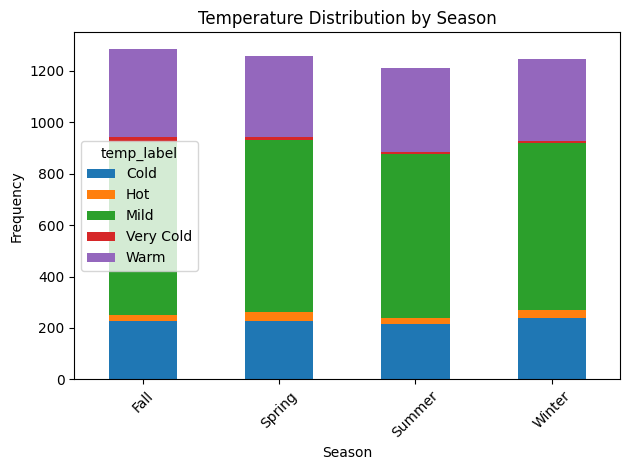

In [ ]:
plt.figure(figsize=(10,6))
df.groupby(['season', 'temp_label']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Temperature Distribution by Season')
plt.ylabel('Frequency')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

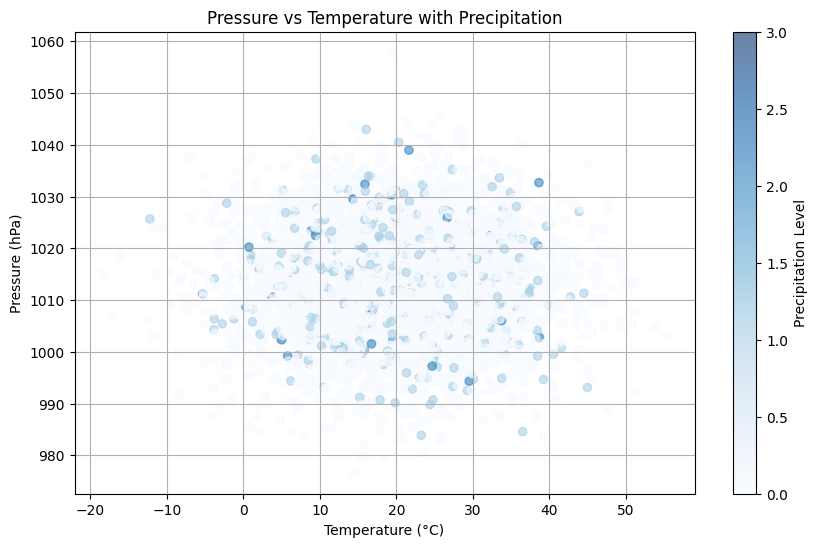

In [ ]:
# Visualization 2: Pressure vs Temperature with precipitation
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['temperature'], df['pressure'],
                     c=df['precip_category'], cmap='Blues', alpha=0.6)
plt.colorbar(scatter, label='Precipitation Level')
plt.title('Pressure vs Temperature with Precipitation')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (hPa)')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

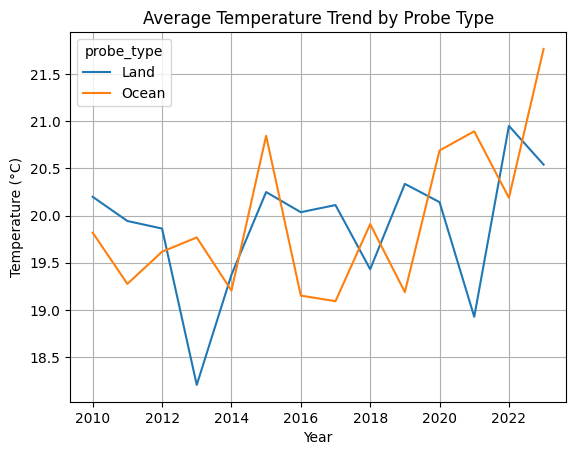

In [ ]:
# Visualization 3: Time series of average temperature by probe type (simulated)
# Assuming first 50 probes are land, next 50 are ocean
df['probe_type'] = df['probe_id'].apply(lambda x: 'Land' if int(x[1:]) <= 50 else 'Ocean')
df['year'] = df['date'].dt.year

plt.figure(figsize=(12,6))
df.groupby(['year', 'probe_type'])['temperature'].mean().unstack().plot()
plt.title('Average Temperature Trend by Probe Type')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

# **Conclusion**

Discretization effectively transformed continuous weather data into meaningful categorical ranges (e.g., "Cold"/"Hot" for temperature, "Light"/"Heavy" for precipitation), enabling clearer visual pattern recognition. By converting raw sensor measurements into discrete bins, the visualizations:

**Simplified complex trends** (e.g., seasonal temperature shifts)

**Highlighted critical thresholds** (e.g., extreme precipitation events)

**Improved interpretability of multidimensional relationships** (e.g., pressure-temperature correlations)

This approach balances detail retention with visual clarity, making it ideal for identifying weather patterns and anomalies in large-scale datasets. Future enhancements could explore adaptive binning strategies for localized climate conditions.

**Key Benefit:** Discretization bridges raw data and actionable insights through intuitive visualization.



#**Review Questions:**

##**Q1: How does the process of Equal Width Discretization transform continuous data into discrete categories, and what role does the choice of the number of bins play in the outcome?**

Divides the data range into equal-sized intervals (bins)

Each continuous value is assigned to its corresponding bin

The number of bins determines:

Granularity of analysis (more bins = finer distinctions)

Interpretability (fewer bins = clearer categories)

Sensitivity to outliers (more bins may create sparse categories)

## **Q2 What insights can be derived from the histogram of the original continuous data, and how does it help in understanding the distribution of the data after discretization?**

Reveals underlying data distribution (normal, skewed, bimodal)

Shows frequency concentrations and outliers

Guides discretization by:

Identifying natural breaks in distribution

Highlighting where equal-width may distort patterns

Suggesting optimal bin counts to preserve distribution shape

##**Q3 What are the potential advantages and limitations of using Equal Width Discretization for continuous data, and how can the choice of bin width affect the analysis of the data?**
Advantages:

Simple to implement and interpret

Maintains original scale meaning

Consistent bin widths aid comparison

Limitations:

Sensitive to outliers (may create empty bins)

Can group dissimilar values if distribution is uneven

May obscure natural clusters

Bin Width Impact:

Too wide: Loss of important variations

Too narrow: Over-fragmentation of patterns

Optimal choice balances resolution with meaningful groupings

# **GitHub Link:**

